### important points to remember 

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns

In [53]:
df = pd.read_csv('corpus_output/corpus1.txt', header=None, names=['content'])

In [54]:
df.to_csv('corpus1.csv', index=False)

In [55]:
df.shape

(202, 1)

In [56]:
df.info

<bound method DataFrame.info of                                                content
0    projectsnew eventsvisitsabout internship fsm p...
1    projectsnew eventsvisitsabout internship fsm p...
2                        projectsnew eventsvisitsabout
3                        projectsnew eventsvisitsabout
4                        projectsnew eventsvisitsabout
..                                                 ...
197                                        infoiafsmin
198                      projectsnew eventsvisitsabout
199                      projectsnew eventsvisitsabout
200                      projectsnew eventsvisitsabout
201                      projectsnew eventsvisitsabout

[202 rows x 1 columns]>

In [57]:
df.describe

<bound method NDFrame.describe of                                                content
0    projectsnew eventsvisitsabout internship fsm p...
1    projectsnew eventsvisitsabout internship fsm p...
2                        projectsnew eventsvisitsabout
3                        projectsnew eventsvisitsabout
4                        projectsnew eventsvisitsabout
..                                                 ...
197                                        infoiafsmin
198                      projectsnew eventsvisitsabout
199                      projectsnew eventsvisitsabout
200                      projectsnew eventsvisitsabout
201                      projectsnew eventsvisitsabout

[202 rows x 1 columns]>

In [58]:
df.isnull().sum()

content    0
dtype: int64

In [59]:
df.head()

,content
0,projectsnew eventsvisitsabout internship fsm p...
1,projectsnew eventsvisitsabout internship fsm p...
2,projectsnew eventsvisitsabout
3,projectsnew eventsvisitsabout
4,projectsnew eventsvisitsabout


In [60]:
df.tail()

,content
197,infoiafsmin
198,projectsnew eventsvisitsabout
199,projectsnew eventsvisitsabout
200,projectsnew eventsvisitsabout
201,projectsnew eventsvisitsabout


# Data cleaning and wrangling

In [61]:
df.nunique()

content    46
dtype: int64

In [110]:
df['TotalWords'] = df['content'].str.split().str.len()


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     202 non-null    object
 1   TotalWords  202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


### Statistical description

In [64]:
df.describe()

,TotalWords
count,202.000000
mean,25.024752
std,48.677581
min,1.000000
25%,2.000000
50%,4.000000
75%,31.000000
max,276.000000


In [65]:
col1=df.select_dtypes(include=['object']).columns
col2 = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(col1)
print("Numerical Variables:")
print(col2)

Categorical Variables:
Index(['content'], dtype='object')
Numerical Variables:
['TotalWords']


# EDA Univariate Analysis

- Visualizing the corpus
- And designing the graphs using matplotlib

TotalWords
skew:  4.07


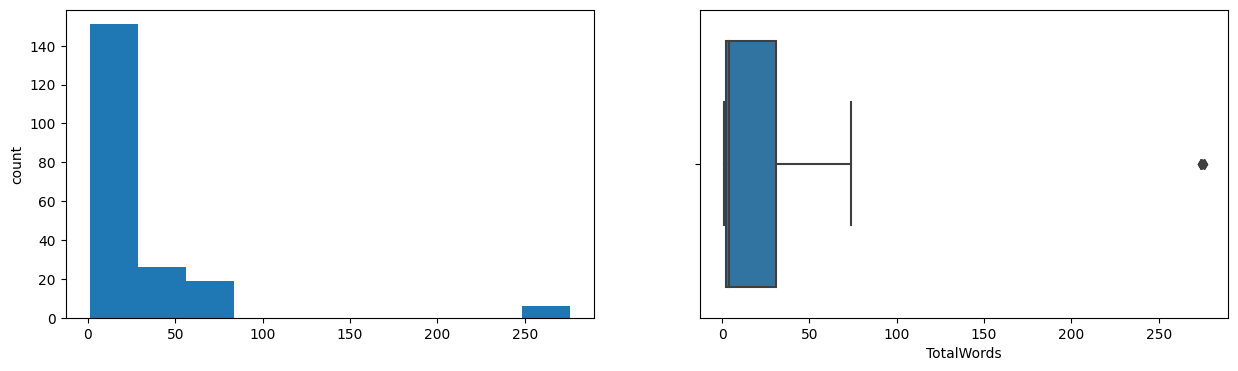

In [66]:
for col in col2:
    print(col)
    print('skew: ',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

- Univariate analysis can be done for both Categorical and Numerical variables.
- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.
- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In [71]:
print(df.columns)

Index(['content', 'TotalWords'], dtype='object')


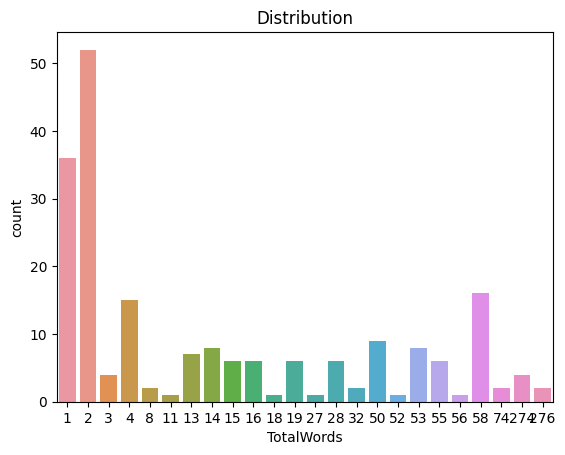

In [81]:
sns.countplot(x='TotalWords',data=df)
plt.title("Distribution")
plt.show()

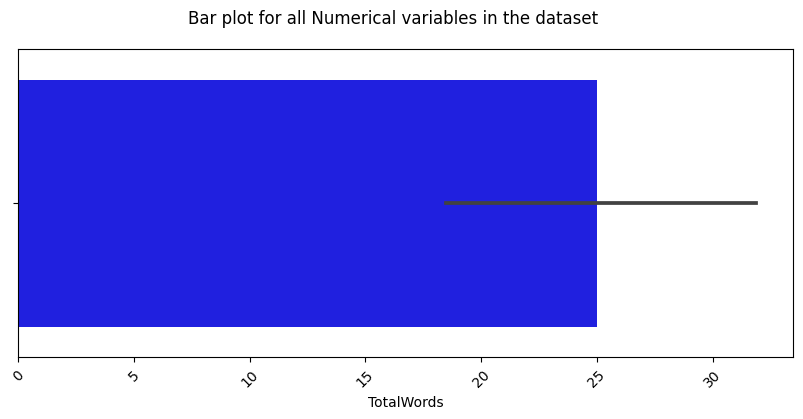

In [97]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig= plt.figure(figsize=(10,4))
axes = fig.subplots(1,1)
fig.suptitle('Bar plot for all Numerical variables in the dataset')

sns.barplot(ax=axes, x='TotalWords', data=df, color='blue', order=df['TotalWords'].value_counts().index)

axes.tick_params(labelrotation=45)

plt.show()


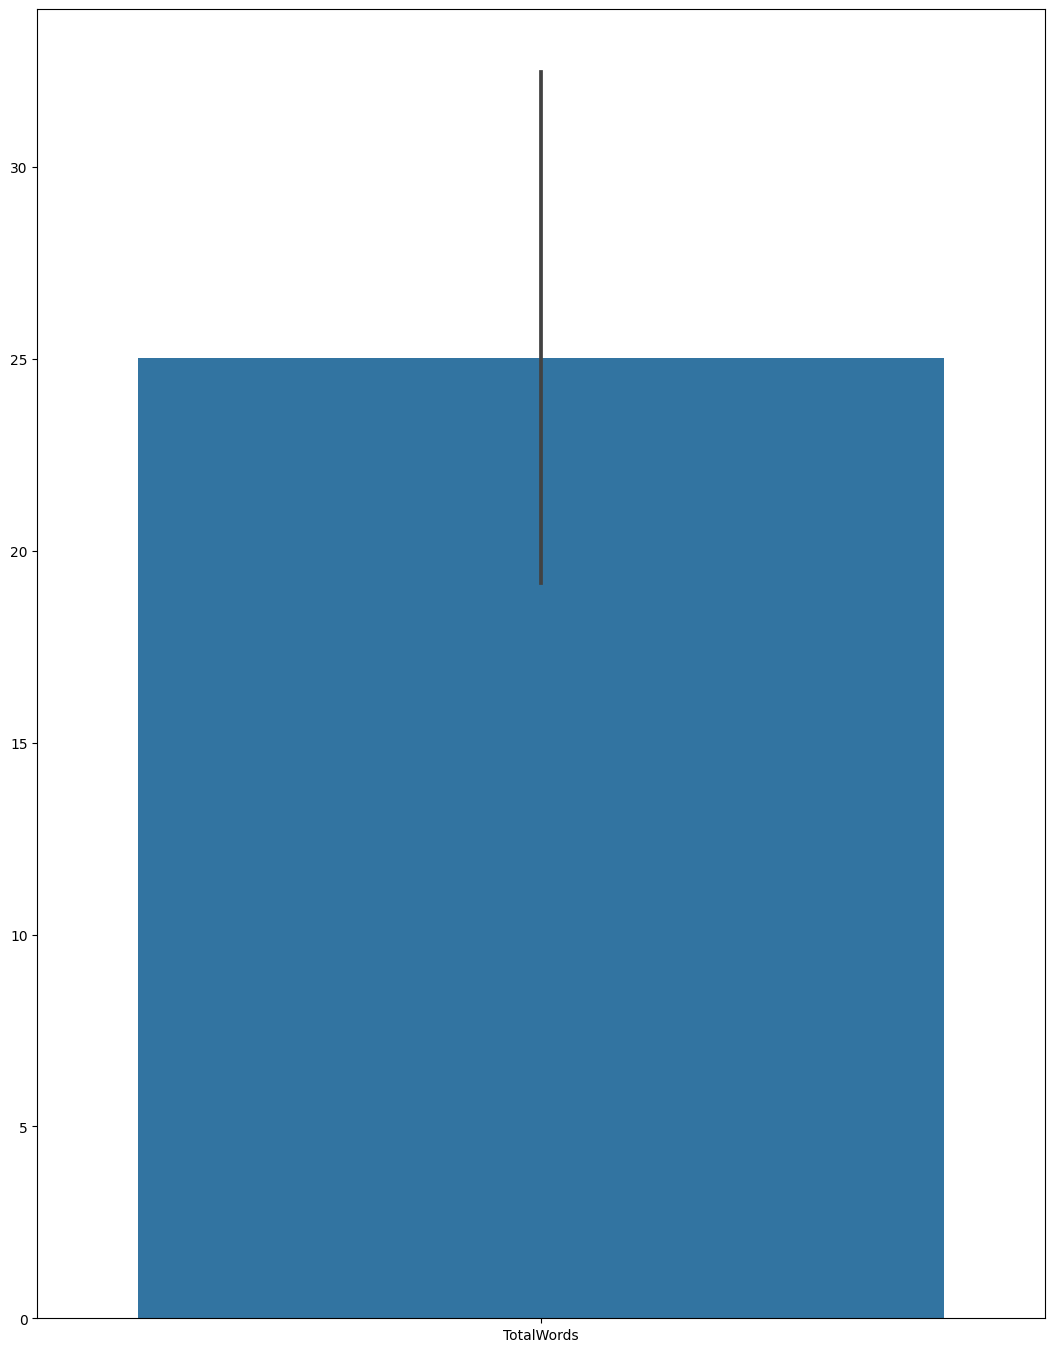

In [109]:
plt.figure(figsize=(13,17))
sns.barplot(data=df.drop(['content'],axis=1))
plt.show()

In [116]:
df.drop('ContentLength',axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     202 non-null    object
 1   TotalWords  202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


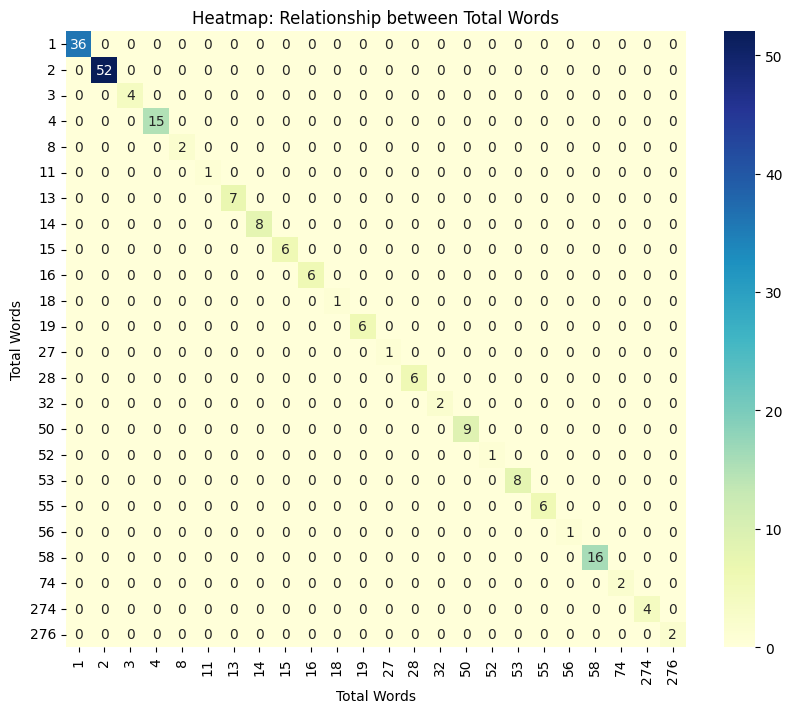

In [119]:
# Create a pivot table
pivot_table = df.pivot_table(index='TotalWords', columns='TotalWords', aggfunc='size', fill_value=0)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap: Relationship between Total Words')
plt.xlabel('Total Words')
plt.ylabel('Total Words')
plt.show()